In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
behaviour = pd.read_csv('user_behavior_dataset.csv')

In [16]:
behaviour.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [17]:
behaviour.size

7700

In [18]:
# A little about the User Behaviour Column
#Column User Behaviour Class provides us the type of engagement the consumer is doing.
#1:Inactive/Low Engagement
#2:Occasional/Light Usage
#3:Regular/Moderate Usage
#4:Active/High Engagement
#5:Power User/Very High Engagement

In [19]:
#Adding the Decription of the User Behaviour Column to the data frame
User_Behavior_Class_Description = {
    1: 'Inactive/Low Engagement',
    2: 'Occasional/Light Usage',
    3: 'Regular/Moderate Usage',
    4: 'Active/High Engagement',
    5: 'Power User/Very High Engagement'
}
behaviour['User Behavior Class Description'] = behaviour['User Behavior Class'].map(User_Behavior_Class_Description)

In [20]:
behaviour.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,User Behavior Class Description
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Active/High Engagement
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Regular/Moderate Usage
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Occasional/Light Usage
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Regular/Moderate Usage
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,Regular/Moderate Usage


In [40]:
behaviour.dtypes

User ID                              int64
Device Model                        object
Operating System                    object
App Usage Time (min/day)             int64
Screen On Time (hours/day)         float64
Battery Drain (mAh/day)              int64
Number of Apps Installed             int64
Data Usage (MB/day)                  int64
Age                                  int64
Gender                              object
User Behavior Class                  int64
User Behavior Class Description     object
dtype: object

In [21]:
#Checking the na values in the dataframe
behaviour.isna().sum()

User ID                            0
Device Model                       0
Operating System                   0
App Usage Time (min/day)           0
Screen On Time (hours/day)         0
Battery Drain (mAh/day)            0
Number of Apps Installed           0
Data Usage (MB/day)                0
Age                                0
Gender                             0
User Behavior Class                0
User Behavior Class Description    0
dtype: int64

In [22]:
behaviour.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [23]:
#Name of all the columns 
behaviour.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'User Behavior Class Description'],
      dtype='object')

In [52]:
behaviour['Gender(int)'] = behaviour['Gender'].map({'Male': 0,'Female': 1})
behaviour['OS(int)'] = behaviour['Operating System'].map({'Android': 0,'iOS': 1})



In [53]:
# Lets check the correlation of different vector have on each other
behaviour[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class','Gender(int)','OS(int)']].corr(method='pearson')

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Gender(int),OS(int)
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498,0.004551,0.031577
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581,-0.003573,0.026470
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587,-0.006271,0.040361
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255,-0.016245,0.038984
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734,-0.023151,0.028687
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563,-0.006965,0.020358
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000,0.000735,0.041326
Gender(int),0.004551,-0.003573,-0.006271,-0.016245,-0.023151,-0.006965,0.000735,1.000000,0.027589
OS(int),0.031577,0.026470,0.040361,0.038984,0.028687,0.020358,0.041326,0.027589,1.000000


In [107]:
#Fuction Definations:

#Histogram Function:
def plot_hist(ax,data , x_var, bins,color, edgecolor,alpha,title,xlabel,ylabel):
    n, bins, patches = ax.hist(x_var,bins=bins,color=color,edgecolor=edgecolor,alpha=alpha)
    ax.set_title(title,fontsize=14,fontweight='bold')
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    ax.grid(which='major', axis='both')

#Bar Chart Function:
def plot_barplot(ax,data,column_name,title,xlabel,ylabel,color1,color2):
    counts = data[column_name].value_counts()
    counts.plot(
        kind='bar',
        color=[color1, color2],
        ax=ax
    )
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

#Box Plot Function:

def plot_boxplot(ax,data,xcolumn_label,yaxiscolumn,title,rotation_direction,xlabel,ylabel,facecolor,color,xticklabelcolumnname,rotation_angle):
    ax.set_facecolor('#f0f0f0')
    ax.boxplot([data[data[xcolumn_label] == label][yaxiscolumn] for label in behaviour[xcolumn_label].unique()], patch_artist=True, boxprops=dict(facecolor=facecolor, color=color))

    #Setting the Labels and Title
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xticklabels(behaviour[xticklabelcolumnname].unique(),rotation=rotation_angle,ha=rotation_direction, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_yticklabels(np.arange(15,70,5))
    plt.show()

#Scatter Plot : 
def plot_scatterplot(ax,xlabel,ylabel,hue,palette,alpha,legend_title,location_of_title,title):
    ax.set_facecolor('#f0f0f0')
    sns.scatterplot(data=behaviour,x=xlabel,y=ylabel,hue=hue,palette=palette,alpha=alpha)
    ax.legend(title=legend_title,loc=location_of_title,fontsize=10)
    ax.set_title(title,fontsize=14, fontweight='bold')
    counts = behaviour['User Behavior Class Description'].value_counts()

    for category, count in counts.items():
        print(f"{category}, Number of Users: {count}")
    plt.show()

    

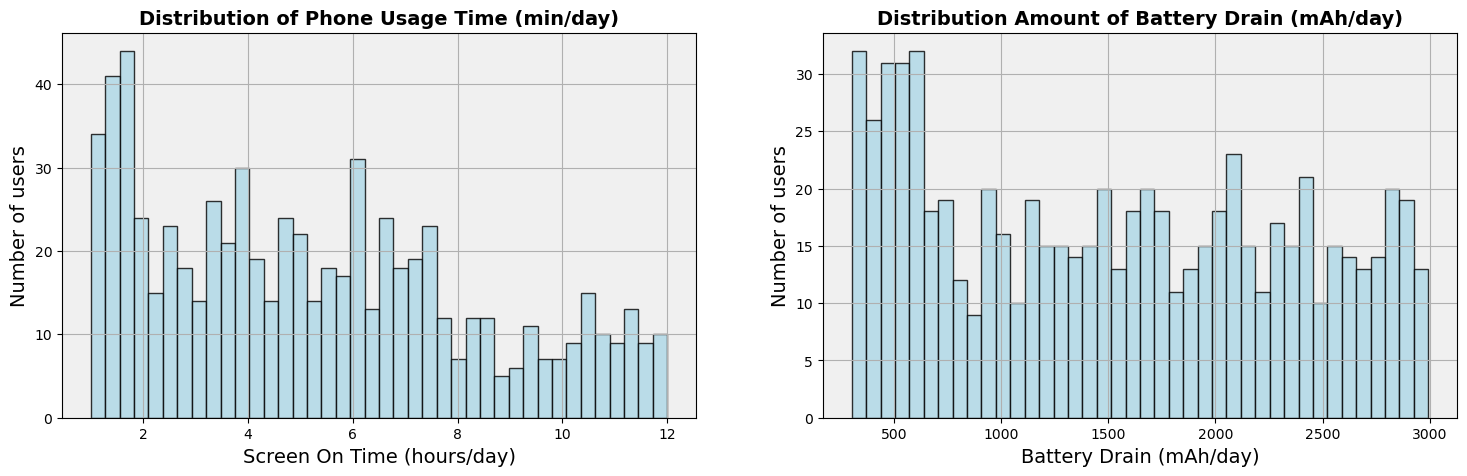

In [108]:


fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(18, 5))
ax1.set_facecolor('#f0f0f0')
ax2.set_facecolor('#f0f0f0')

#Studying the Screen ON Time
plot_hist(ax1,behaviour,behaviour['Screen On Time (hours/day)'],40,'Lightblue','black',0.8,'Distribution of Phone Usage Time (min/day)','Screen On Time (hours/day)','Number of users')

#Studying the Battery Drain Amount
plot_hist(ax2,behaviour,behaviour['Battery Drain (mAh/day)'],40,'Lightblue','black',0.8,'Distribution Amount of Battery Drain (mAh/day)','Battery Drain (mAh/day)','Number of users')


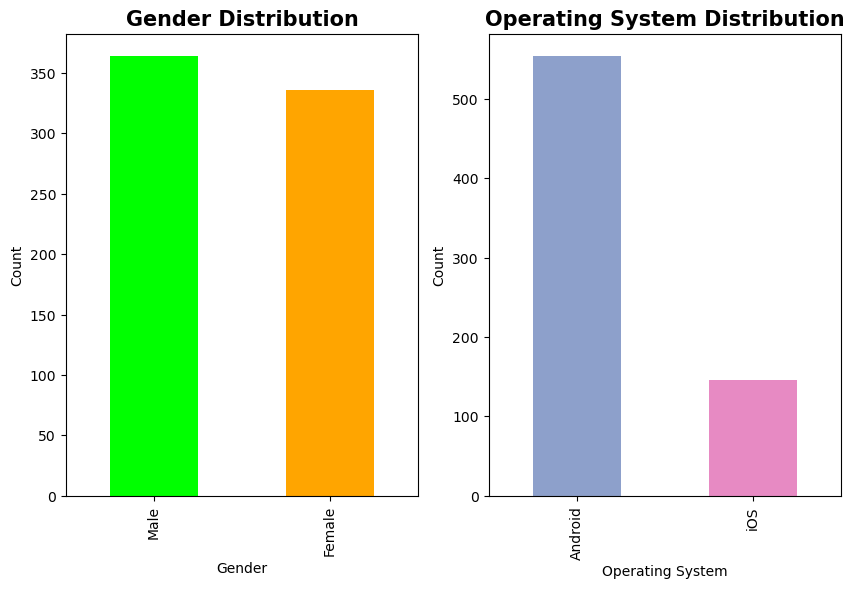

In [109]:
#Lets check the gender and OS distribution in the Dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

#Gender Distribution


plot_barplot(ax1,behaviour,'Gender','Gender Distribution','Gender','Count','lime','orange')


# Operating System distribution 

plot_barplot(ax2,behaviour,'Operating System','Operating System Distribution','Operating System','Count','#8da0cb','#e78ac3')



C:\Users\ritik\AppData\Local\Temp\ipykernel_7012\3713778055.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(15,70,5))


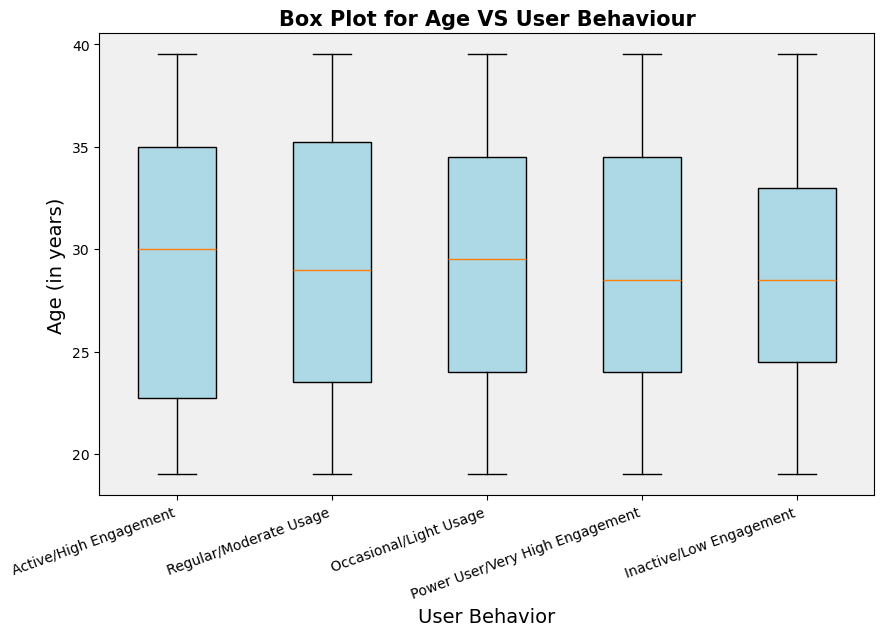

In [110]:
#Lets Study the distribution of AGE according to different User Behaviour Class
fig, ax= plt.subplots(figsize=(10, 6))

plot_boxplot(ax,behaviour,'User Behavior Class','Age','Box Plot for Age VS User Behaviour','right','User Behavior','Age (in years)','lightblue','black','User Behavior Class Description',20)




Occasional/Light Usage, Number of Users: 146
Regular/Moderate Usage, Number of Users: 143
Active/High Engagement, Number of Users: 139
Power User/Very High Engagement, Number of Users: 136
Inactive/Low Engagement, Number of Users: 136


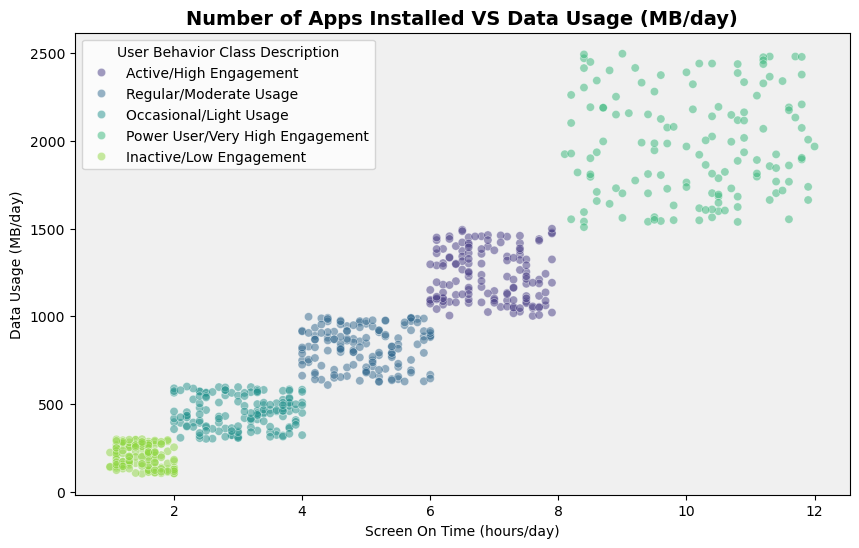

In [111]:
#Checking the distribution of the Number of Apps Installed and the Data Usage (MB/day) they haave with their Behaviour Category
fig, ax= plt.subplots(figsize=(10, 6))

plot_scatterplot(ax,'Screen On Time (hours/day)','Data Usage (MB/day)','User Behavior Class Description','viridis',0.5,'User Behavior Class Description','upper left','Number of Apps Installed VS Data Usage (MB/day)')


Occasional/Light Usage, Number of Users: 146
Regular/Moderate Usage, Number of Users: 143
Active/High Engagement, Number of Users: 139
Power User/Very High Engagement, Number of Users: 136
Inactive/Low Engagement, Number of Users: 136


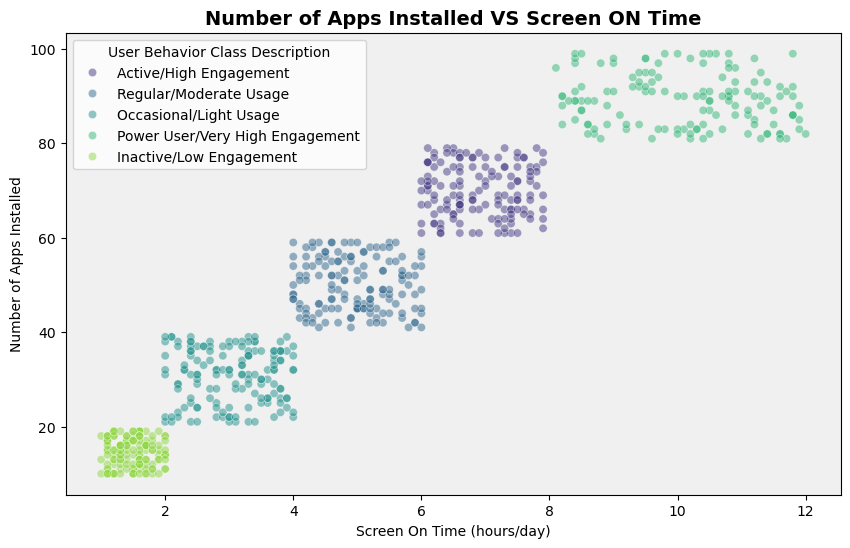

In [112]:
#Checking the distribution of the Number of Apps Installed and the Screen On Time they haave with their Behaviour Category
fig, ax= plt.subplots(figsize=(10, 6))
plot_scatterplot(ax,'Screen On Time (hours/day)','Number of Apps Installed','User Behavior Class Description','viridis',0.5,'User Behavior Class Description','upper left','Number of Apps Installed VS Screen ON Time')

